In [5]:
import numpy as np
import matplotlib.pyplot as plt
im = plt.imread('1005_20UPGM23211816_AfterBonding.jpg')

In [6]:
seuil = 1.65 # norme des vecteur comprises entre 0 et racine de 3
def norme(p):
    return np.sqrt( (p[0]/255)**2 + (p[1]/255)**2 + (p[2]/255)**2 )

def trace(TEST):
    hauteur, largeur = TEST.shape[0], TEST.shape[1]
    L = []
    for i in range(hauteur):
        p = TEST[i,largeur//2,]
        L.append(norme(p))
    return L

def compte(TEST, seuil):
    lastcounted = False
    compteur = 0
    L = trace(TEST)
    for x in L:
        if x > seuil and not lastcounted:
            compteur+=1
            lastcounted = True
        elif x < seuil:
            lastcounted = False
    return compteur

In [7]:
def reperecolonnehautgauche(im,i,j):
    if compte(     np.array([[ im[i + kx,j + ky,].tolist() for ky in range(15) ] for kx in range(300) ])    ,     seuil) < 3:
        return False
    return True

def reperelignehautgauche(im,i,j):
    if compte(     np.array([[ im[i + kx,j + ky,].tolist() for ky in range(15) ] for kx in range(100) ])    ,     seuil) < 3:
        return False
    return True

def trouvefilshautgauche(im):
    i,j = 100,500
    
    while j < 1000:
        if not reperecolonnehautgauche(im,i,j):
            j+=1
        else:
            break

    while i < 300:
        if not reperelignehautgauche(im,i,j):
            i+=1
        else:
            return i,j
    return "echec"
def trouvefilshautdroite(im):
    height, width = im.shape[0], im.shape[1]
    for j in range(500,1000):
        if compte(     np.array([[ im[kx,width - j + ky,].tolist() for ky in range(15) ] for kx in range(300) ])    ,     seuil) > 3:
            return j
    return "echec"



def reperecolonnebasgauche(im,i,j):
    height, width = im.shape[0], im.shape[1]
    if compte(     np.array([[ im[height - kx-1,j + ky,].tolist() for ky in range(15) ] for kx in range(300) ])    ,     seuil) < 3:
        return False
    return True

def reperelignebasgauche(im,i,j):
    height, width = im.shape[0], im.shape[1]
    if compte(     np.array([[ im[height - i - kx - 1,j + ky,].tolist() for ky in range(15) ] for kx in range(100) ])    ,     seuil) < 3:
        return False
    return True

def trouvefilsbasgauche(im):
    i,j = 100,500
    
    while j < 1000:
        if not reperecolonnebasgauche(im,i,j):
            j+=1
        else:
            break

    while i < 300:
        if not reperelignebasgauche(im,i,j):
            i+=1
        else:
            return i,j
    return "echec"

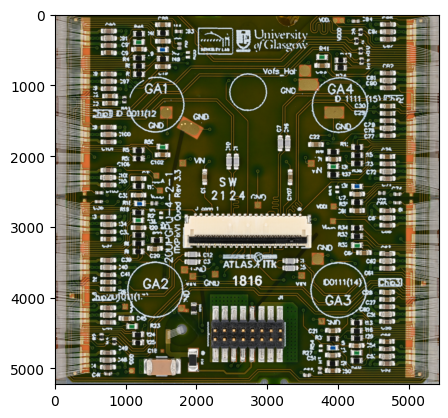

In [9]:
def cropim(im):
    height, width = im.shape[0], im.shape[1]
    ih, ib, jg, jd = trouvefilshautgauche(im)[0], trouvefilsbasgauche(im)[0], max(trouvefilshautgauche(im)[1],trouvefilsbasgauche(im)[1]), trouvefilshautdroite(im)
    return ih, ib, jg, jd

ih, ib, jg, jd = cropim(im)
height, width = im.shape[0], im.shape[1]
im2 = np.array([[ im[i,j,].tolist() for j in range(jg,width - jd)] for i in range(ih,height - ib) ])
im2 = im2.astype('uint8')

plt.imshow(im2)

plt.imsave("croppedimage.jpg",im2)